In [1]:
# import lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print('All lib loaded')

All lib loaded


In [2]:
# load the data set
data = pd.read_csv('pima-indians-diabetes_1709575287463.csv')

In [3]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

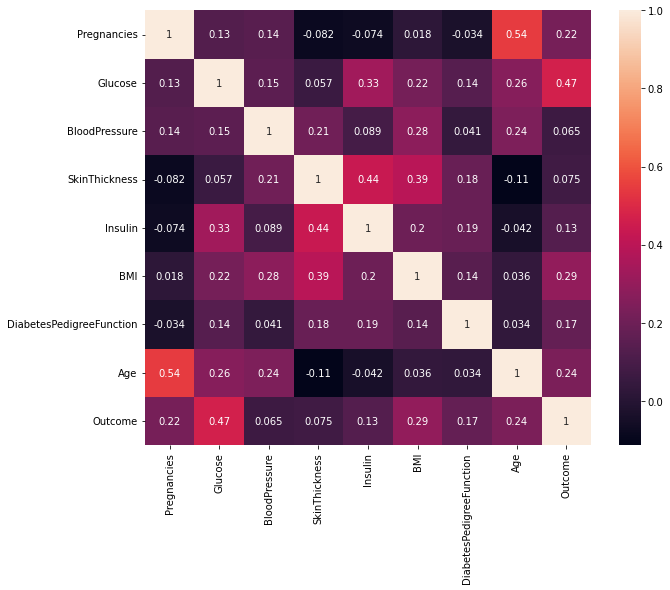

In [6]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [7]:
# extract indep & dependent
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [8]:
# create train set & test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [9]:
# apply std scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [10]:
# Apply decision tree classifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

In [11]:
# evaluate the accuracy
from sklearn.metrics import accuracy_score

print('Test accuracy', accuracy_score(y_test, y_pred))

y_pred_train = dt.predict(X_train)
print('Train accuracy', accuracy_score(y_train, y_pred_train))

Test accuracy 0.7447916666666666
Train accuracy 0.84375


In [12]:
# help(dt)

In [13]:
# apply grid search cv
from sklearn.model_selection import GridSearchCV

ml1 = DecisionTreeClassifier()

param_grid = {
        'max_depth': [3, 4, 5, 6],
        'max_features': [1, 3, 5],
        'min_samples_split': [2, 3, 5, 10],
        'min_samples_leaf': [1, 2, 3, 4],
        'criterion': ['gini', 'entropy']
}    

grid = GridSearchCV(ml1, param_grid, refit=True, verbose=1, cv=5, n_jobs=-1)

grid_search = grid.fit(X_train, y_train)

Fitting 5 folds for each of 384 candidates, totalling 1920 fits


In [14]:
print(grid_search.best_params_)

{'criterion': 'entropy', 'max_depth': 5, 'max_features': 5, 'min_samples_leaf': 3, 'min_samples_split': 2}


In [15]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=4, 
                            max_features=5, min_samples_leaf=3, 
                            min_samples_split=10)

dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

In [16]:
# evaluate the accuracy
from sklearn.metrics import accuracy_score

print('Test accuracy', accuracy_score(y_test, y_pred))

y_pred_train = dt.predict(X_train)

print('Train accuracy', accuracy_score(y_train, y_pred_train))

Test accuracy 0.6822916666666666
Train accuracy 0.7951388888888888


In [17]:
# feature importance
print(dt.feature_importances_)

[0.03896924 0.44523754 0.         0.01199841 0.         0.25107258
 0.04753945 0.20518278]


In [18]:
X.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [19]:
dict1 = dict(zip(X.columns, dt.feature_importances_))
dict1

{'Pregnancies': 0.03896924374325515,
 'Glucose': 0.4452375371686477,
 'BloodPressure': 0.0,
 'SkinThickness': 0.011998407595843216,
 'Insulin': 0.0,
 'BMI': 0.25107258339527266,
 'DiabetesPedigreeFunction': 0.047539446097618884,
 'Age': 0.2051827819993622}

In [20]:
# Apply Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

In [21]:
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

In [22]:
print('Test Accuracy', accuracy_score(y_test, y_pred))
y_pred_train = rf.predict(X_train)
print('Train Accuracy', accuracy_score(y_train, y_pred_train))

Test Accuracy 0.734375
Train Accuracy 1.0


In [23]:
#help(rf)

In [24]:
grid_search grid search cv
from sklearn.model_selection import GridSearchCV

rf1 = RandomForestClassifier()

param_grid = {
        'n_estimators': [50, 100, 200, 400],
        'max_depth': [3, 4, 5, 6],
        'max_features': [1, 3, 5],
        'min_samples_split': [2, 3, 5, 10],
        'min_samples_leaf': [1, 2, 3, 4],
        'criterion': ['gini', 'entropy']
}    

grid = GridSearchCV(rf1, param_grid, refit=True, verbose=1, cv=5, n_jobs=-1)

grid_search = grid.fit(X_train, y_train)

Fitting 5 folds for each of 1536 candidates, totalling 7680 fits


In [28]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 50}

In [31]:
rf2 = RandomForestClassifier(criterion= 'gini',
 max_depth= 5,
 max_features= 5,
 min_samples_leaf= 2,
 min_samples_split= 10,
 n_estimators= 50)

In [33]:
rf2.fit(X_train, y_train)
y_pred = rf2.predict(X_test)

In [34]:
print('Test Accuracy', accuracy_score(y_pred, y_test))

y_pred_train = rf2.predict(X_train)

print('Train Accuracy', accuracy_score(y_pred_train, y_train))


Test Accuracy 0.734375
Train Accuracy 0.8645833333333334
